# Lenguajes de Programación con Python
## Exploratory Data Analysys (EDA)
### Case: Bank Deposit

#### Name: Luis Ivan Umpire Alvarez

In [156]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [157]:
print(f'numpy version  : {np.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'seaborn version: {sns.__version__}')


numpy version  : 1.26.2
pandas version : 2.1.3
seaborn version: 0.13.0


In [158]:
# opening the file
df = pd.read_csv('bank_term_diposit.csv', sep=';', encoding='ISO-8859-1')
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no


In [159]:
df.dtypes

age                            int64
job                           object
marital                       object
education                     object
housing                       object
loan                          object
contact                       object
month                         object
day_of_week                   object
duration                       int64
campaign                       int64
poutcome                      object
employment_variation_rate    float64
has_subscribed                object
dtype: object

In [160]:
# Fast Statistics
df.describe()

,age,duration,campaign,employment_variation_rate
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.081886
std,10.42125,259.279249,2.770014,1.570960
min,17.00000,0.000000,1.000000,-3.400000
25%,32.00000,102.000000,1.000000,-1.800000
50%,38.00000,180.000000,2.000000,1.100000
75%,47.00000,319.000000,3.000000,1.400000
max,98.00000,4918.000000,56.000000,1.400000


In [161]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 41188
Number of columns: 14


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   job                        41188 non-null  object 
 2   marital                    41188 non-null  object 
 3   education                  41188 non-null  object 
 4   housing                    41188 non-null  object 
 5   loan                       41188 non-null  object 
 6   contact                    41188 non-null  object 
 7   month                      41188 non-null  object 
 8   day_of_week                41188 non-null  object 
 9   duration                   41188 non-null  int64  
 10  campaign                   41188 non-null  int64  
 11  poutcome                   41188 non-null  object 
 12  employment_variation_rate  41188 non-null  float64
 13  has_subscribed             41188 non-null  obj

#### NOTE: There are not nulls, we can verify that

### Null values

In [163]:
df.isna().sum()

age                          0
job                          0
marital                      0
education                    0
housing                      0
loan                         0
contact                      0
month                        0
day_of_week                  0
duration                     0
campaign                     0
poutcome                     0
employment_variation_rate    0
has_subscribed               0
dtype: int64

#### NOTE: Now, I can conclude there are not nulls.

### Duplicates

In [164]:
df.duplicated().sum()

15

In [165]:
df[df.duplicated()].sort_values('age')

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
28477,24,services,single,high.school,yes,no,cellular,apr,tue,114,1,nonexistent,-1.8,no
14234,27,technician,single,professional.course,no,no,cellular,jul,mon,331,2,nonexistent,1.4,no
18465,32,technician,single,professional.course,yes,no,cellular,jul,thu,128,1,nonexistent,1.4,no
19608,33,admin.,married,university.degree,yes,no,cellular,aug,thu,59,1,nonexistent,1.4,no
32516,35,admin.,married,university.degree,yes,no,cellular,may,fri,348,4,nonexistent,-1.8,no
12261,36,retired,married,unknown,no,no,telephone,jul,thu,88,1,nonexistent,1.4,no
33296,36,blue-collar,married,basic.9y,no,no,cellular,may,tue,151,1,nonexistent,-1.8,no
1266,39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,nonexistent,1.1,no
25217,39,admin.,married,university.degree,no,no,cellular,nov,tue,123,2,nonexistent,-0.1,no
20534,41,technician,married,professional.course,yes,no,cellular,aug,tue,127,1,nonexistent,1.4,no


#### NOTE: There are no duplicate rows.

## Unique values

In [166]:
def print_unique_values(dataset):
    fields = list(dataset.columns)
    for field in fields:
        print(f'The field "{field}" has these unique values: \n{dataset[field].unique()}\n')
    return 0


In [167]:
print_unique_values(df)

The field "age" has these unique values: 
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

The field "job" has these unique values: 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

The field "marital" has these unique values: 
['married' 'single' 'divorced' 'unknown']

The field "education" has these unique values: 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

The field "housing" has these unique values: 
['no' 'yes' 'unknown']

The field "loan" has these unique values: 
['no' 'yes' 'unknown']

The field "contact" has these unique values: 
['telephone' 'cellular']

The field "month" has these unique values: 
['may' 'jun' 'jul' 

0

## Ploting Histograms for each variable

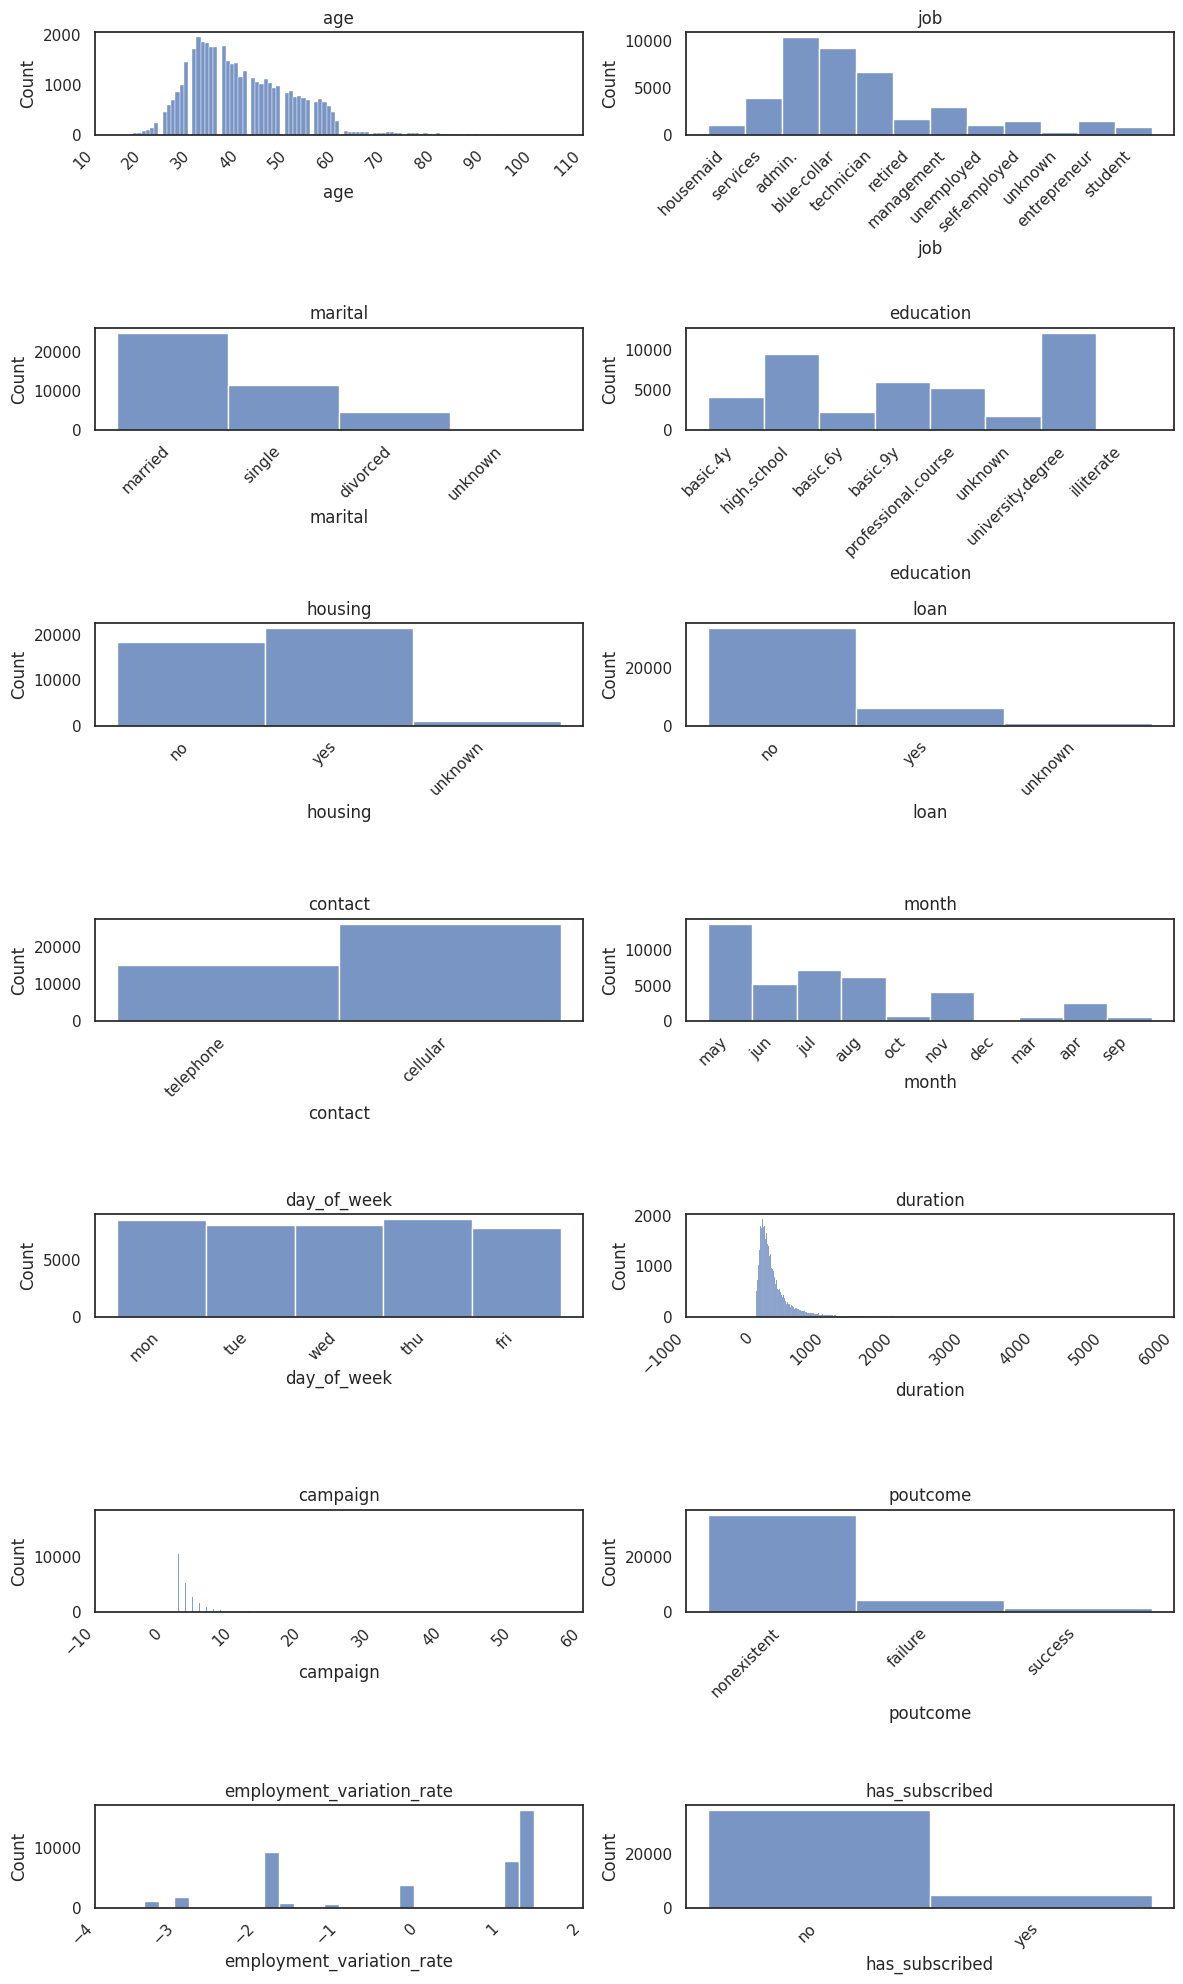

In [168]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 20))

i = 0
j = 0

for field in df:
    position = df.columns.get_loc(field)

    if position%2 == 0:
        j = 0
        i = int(position/2)
        
    else:
        j = 1
        
    sns.histplot(df[field], kde=False, ax=axes[i,j])
    axes[i,j].set_title(field)
    labels = axes[i,j].get_xticklabels()
    axes[i,j].set_xticks(axes[i,j].get_xticks())
    axes[i,j].set_xticklabels(labels, rotation=45, ha='right') 

    

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


### Note: Before continuing, we can remove the 'unknown' values ​​from the columns, because they are few and can cause problems in the analysis.


In [169]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no


In [170]:
df[df['job'] == 'unknown']['job'].count()

330

In [171]:
for field in df:
    n = df[df[field] == 'unknown'][field].count()
    print(f' {field} : {n} ')

 age : 0 
 job : 330 
 marital : 80 
 education : 1731 
 housing : 990 
 loan : 990 
 contact : 0 
 month : 0 
 day_of_week : 0 
 duration : 0 
 campaign : 0 
 poutcome : 0 
 employment_variation_rate : 0 
 has_subscribed : 0 


In [172]:
df.shape[0]

41188

As we have 41K registers, we can eliminate the unknown values

In [173]:
df.drop(df[ df['job'] == 'unknown' ].index, inplace=True)
df.drop(df[ df['marital'] == 'unknown' ].index, inplace=True)
df.drop(df[ df['education'] == 'unknown' ].index, inplace=True)
df.drop(df[ df['housing'] == 'unknown' ].index, inplace=True)
df.drop(df[ df['loan'] == 'unknown' ].index, inplace=True)

In [174]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,nonexistent,-1.1,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,nonexistent,-1.1,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,nonexistent,-1.1,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,nonexistent,-1.1,yes


In [175]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,nonexistent,-1.1,yes
38241,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,nonexistent,-1.1,no
38242,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,nonexistent,-1.1,no
38243,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,nonexistent,-1.1,yes


#### Verifying

In [176]:
for field in df:
    n = df[df[field] == 'unknown'][field].count()
    print(f' {field} : {n} ')

 age : 0 
 job : 0 
 marital : 0 
 education : 0 
 housing : 0 
 loan : 0 
 contact : 0 
 month : 0 
 day_of_week : 0 
 duration : 0 
 campaign : 0 
 poutcome : 0 
 employment_variation_rate : 0 
 has_subscribed : 0 


In [177]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no


## Plotting histograms for each variable


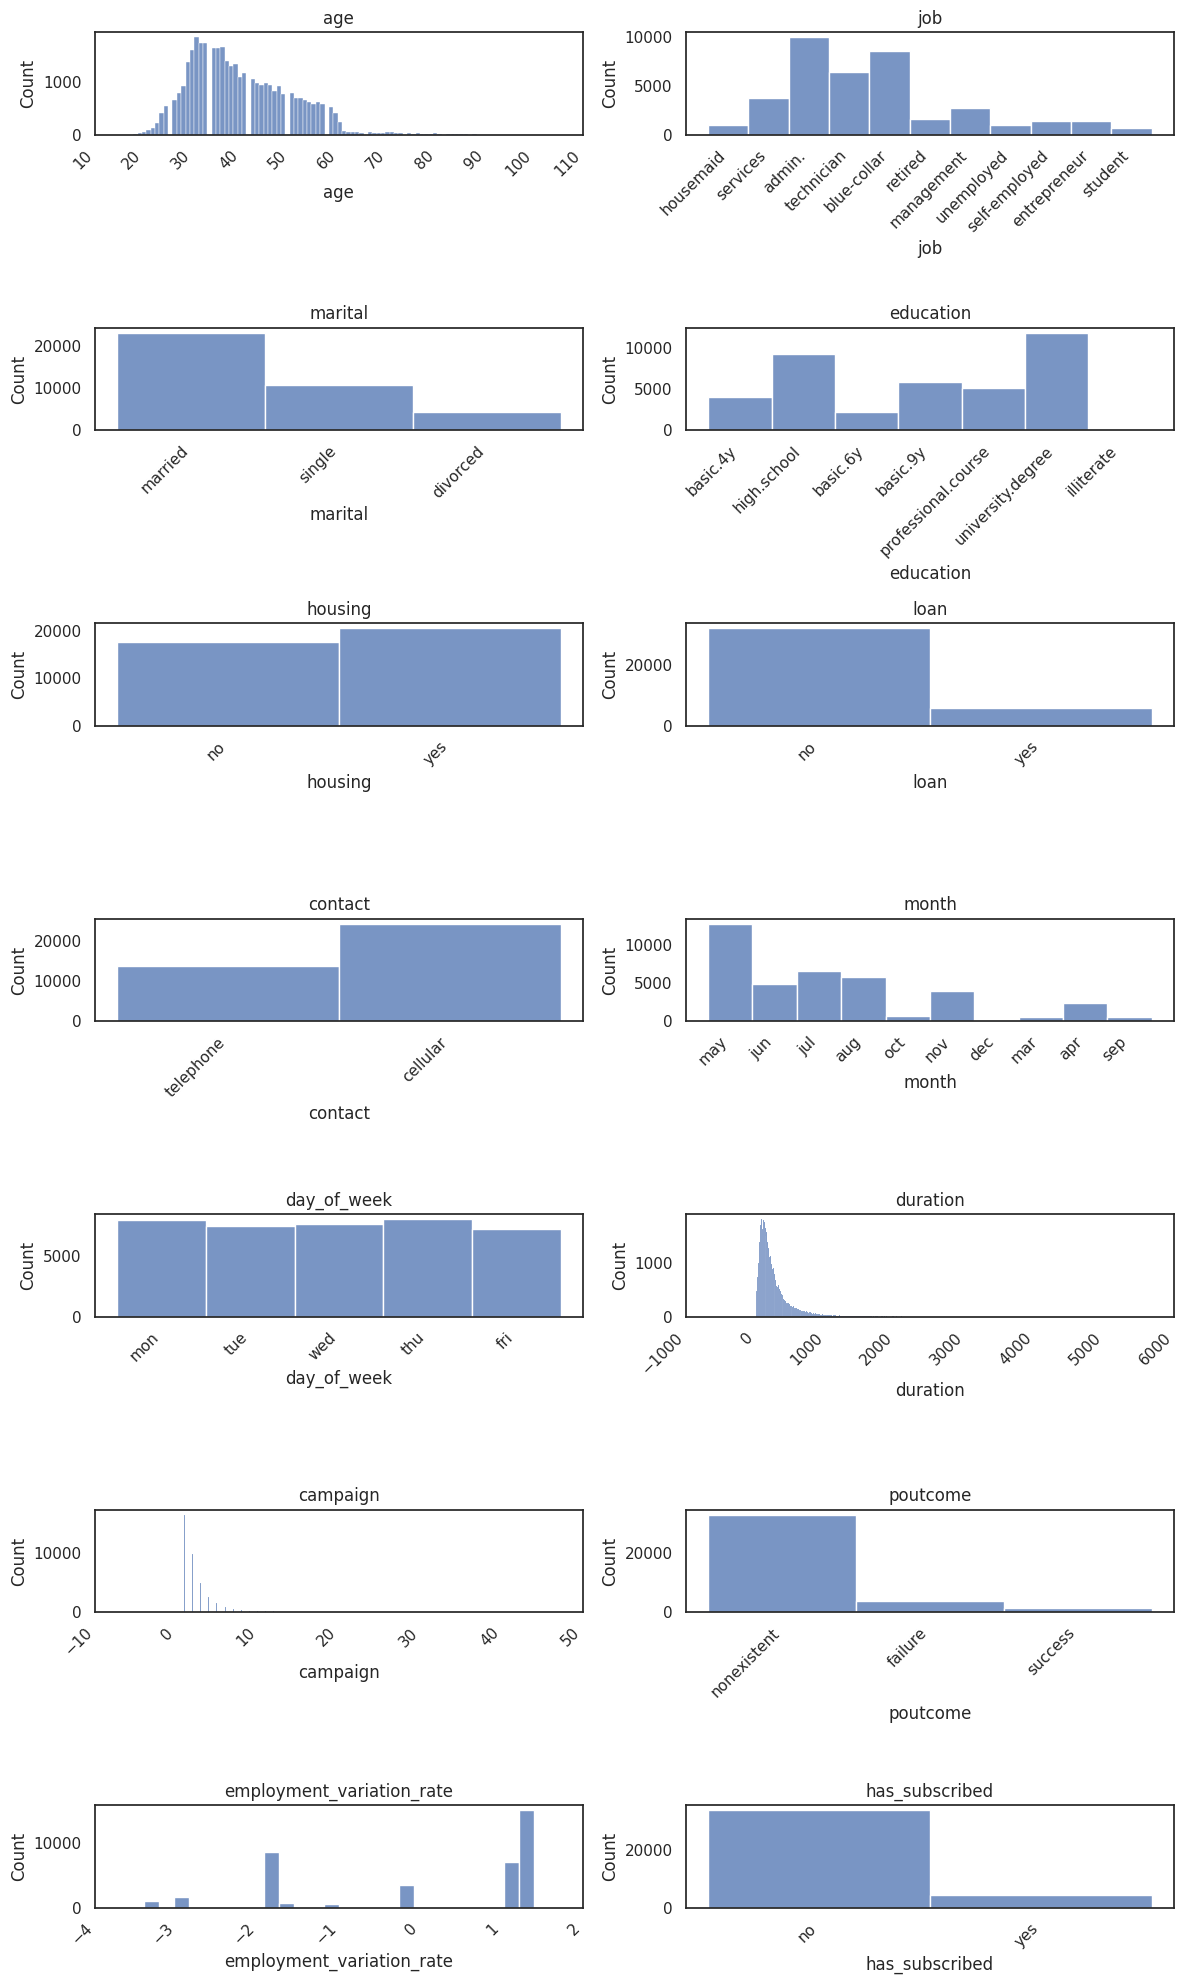

In [178]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 20))

i = 0
j = 0

for field in df:
    position = df.columns.get_loc(field)

    if position%2 == 0:
        j = 0
        i = int(position/2)
        
    else:
        j = 1
        
    sns.histplot(df[field], kde=False, ax=axes[i,j])
    axes[i,j].set_title(field)
    labels = axes[i,j].get_xticklabels()
    axes[i,j].set_xticks(axes[i,j].get_xticks())
    axes[i,j].set_xticklabels(labels, rotation=45, ha='right') 

    

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

## Overview who has subscribed

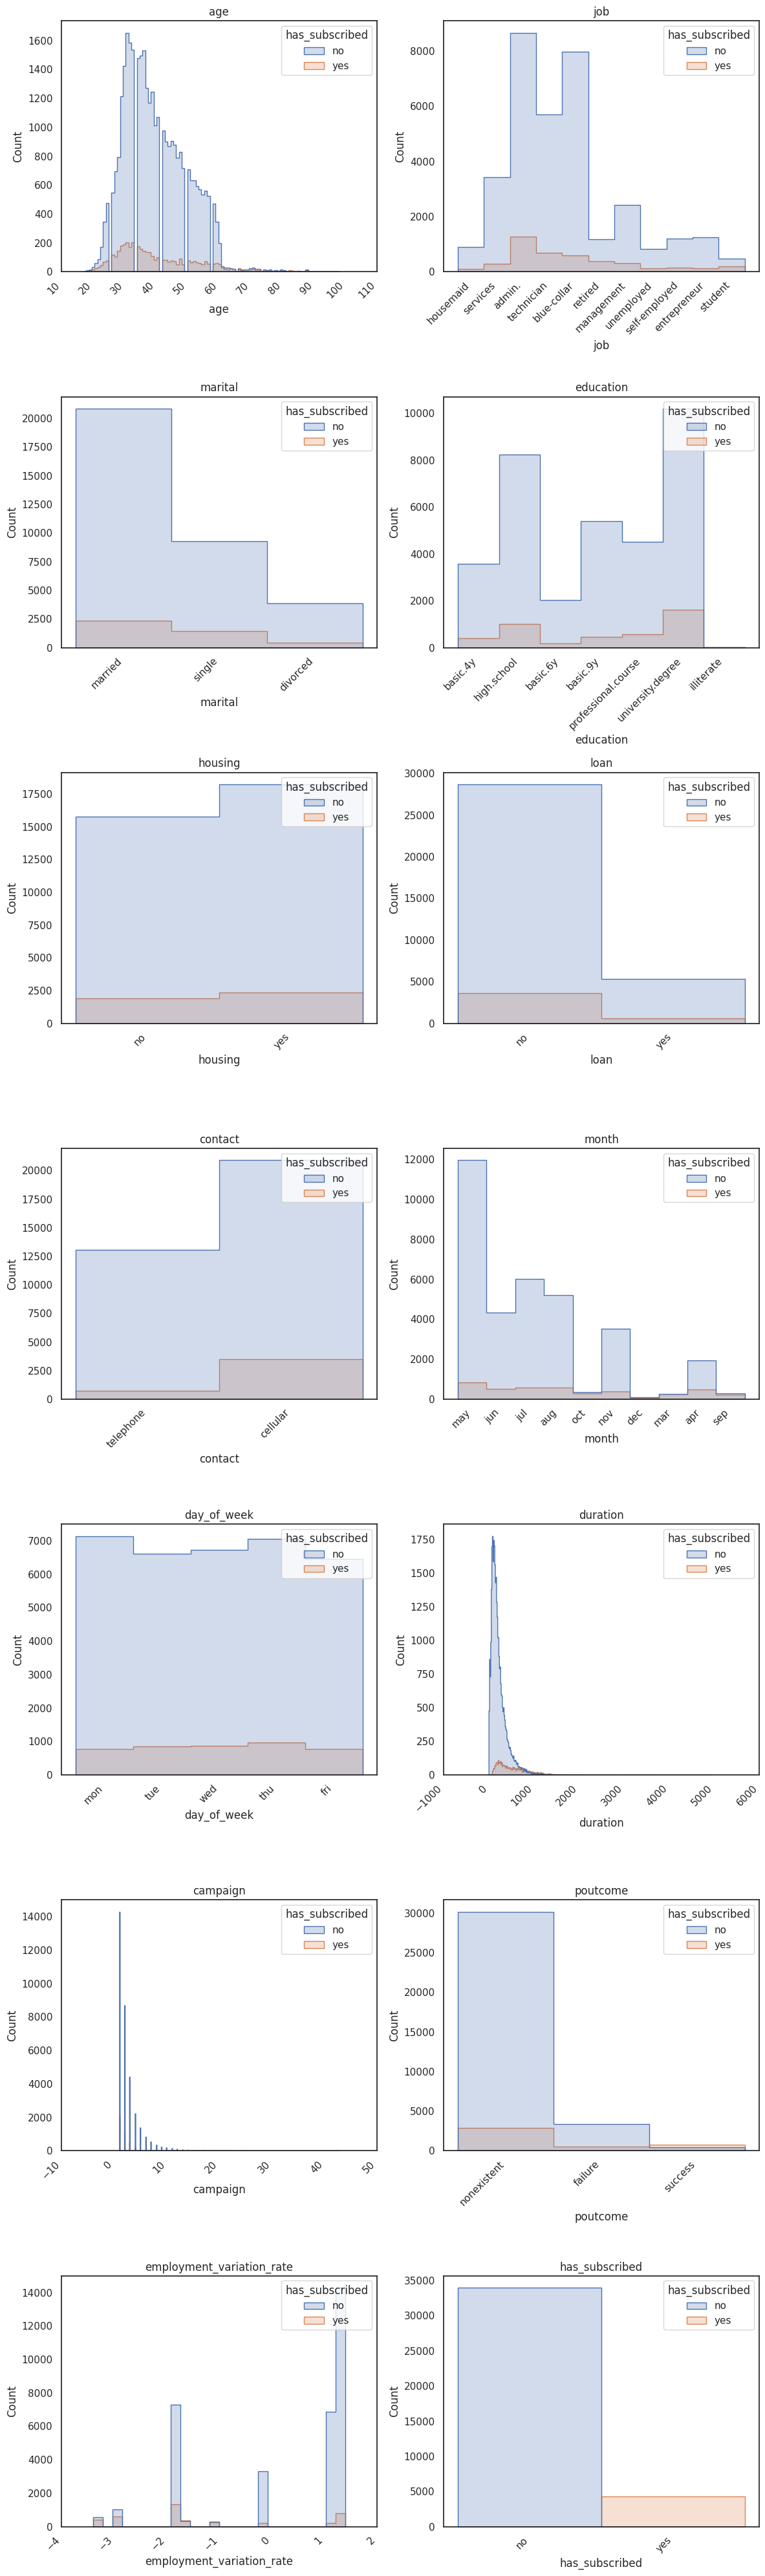

In [179]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 40))

i = 0
j = 0

for field in df:
    position = df.columns.get_loc(field)

    if position%2 == 0:
        j = 0
        i = int(position/2)
        
    else:
        j = 1
        
    #sns.histplot(df[field], kde=False, ax=axes[i,j])
    sns.histplot(data=df, x=field, hue="has_subscribed", element="step", ax=axes[i,j])
    
    axes[i,j].set_title(field)
    labels = axes[i,j].get_xticklabels()
    axes[i,j].set_xticks(axes[i,j].get_xticks())
    axes[i,j].set_xticklabels(labels, rotation=45, ha='right') 

    

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

## First Conclusion:

The people who have subscribed and not subscribed have the same distribution. It is necessary to transform nominal and ordinal values ​​into numerical values ​​to calculate the correlation between any variable and the target variable.

## Working with Ordinal Values

The target variable is 'has_subscribed'. Verifying the correlation between other variables and the target variable is necessary. Before, It was necessary to change the ordinal variables to numeric; we can do this using OneCodeEncoder from the sci-kit-learn library.

In [180]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,has_subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,nonexistent,1.1,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,nonexistent,1.1,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,nonexistent,1.1,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,nonexistent,1.1,no


In [181]:
print_unique_values(df)

The field "age" has these unique values: 
[56 57 37 40 45 59 24 25 29 35 54 46 50 39 30 55 41 34 52 32 38 44 42 60
 53 47 51 48 33 49 31 43 58 36 28 27 26 22 23 20 21 19 18 70 61 66 76 67
 73 88 95 68 75 63 80 62 65 72 64 71 69 78 85 79 77 83 81 74 82 17 87 91
 98 94 86 84 89]

The field "job" has these unique values: 
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

The field "marital" has these unique values: 
['married' 'single' 'divorced']

The field "education" has these unique values: 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

The field "housing" has these unique values: 
['no' 'yes']

The field "loan" has these unique values: 
['no' 'yes']

The field "contact" has these unique values: 
['telephone' 'cellular']

The field "month" has these unique values: 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

The field 

0

## The nominal columns will transform using OneHotEncoder:

| Column  | type | transform |
| -------- | -------- | -------- |
| housing | nominal | yes = 1, no = 0 |
| loan |  nominal| yes = 1, no = 0 |
| has_subscribed | nominal | yes = 1, no = 0 |


In [182]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'employment_variation_rate', 'has_subscribed'],
      dtype='object')

In [183]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['housing', 'loan', 'has_subscribed']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
df2 = pd.concat([df, encoded_df], axis=1)
df2 = df2.drop(columns=columns_to_encode)


In [184]:
df2.head()

,age,job,marital,education,contact,month,day_of_week,duration,campaign,poutcome,employment_variation_rate,housing_yes,loan_yes,has_subscribed_yes
0,56,housemaid,married,basic.4y,telephone,may,mon,261,1,nonexistent,1.1,0.0,0.0,0.0
1,57,services,married,high.school,telephone,may,mon,149,1,nonexistent,1.1,0.0,0.0,0.0
2,37,services,married,high.school,telephone,may,mon,226,1,nonexistent,1.1,1.0,0.0,0.0
3,40,admin.,married,basic.6y,telephone,may,mon,151,1,nonexistent,1.1,0.0,0.0,0.0
4,56,services,married,high.school,telephone,may,mon,307,1,nonexistent,1.1,0.0,1.0,0.0


In [185]:
df2.shape

(38245, 14)

In [186]:
df.shape

(38245, 14)

## The other ordinal variables will be assigned numerical values ​​of 0,1,2,3... the values ​​will be transformed using OrdinalEncoder.

In [187]:
print_unique_values(df2[['job','marital','education', 'contact', 'poutcome']])

The field "job" has these unique values: 
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

The field "marital" has these unique values: 
['married' 'single' 'divorced']

The field "education" has these unique values: 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

The field "contact" has these unique values: 
['telephone' 'cellular']

The field "poutcome" has these unique values: 
['nonexistent' 'failure' 'success']



0

In [188]:
cat_job = ['housemaid', 'student',  'unemployed', 'retired', 'blue-collar', 'services', 
           'technician', 'entrepreneur', 'self-employed', 'admin.', 'management' ]

cat_marital = ['single', 'divorced', 'married']

cat_education = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree' ]

cat_contact = ['telephone', 'cellular']

cat_poutcome = ['nonexistent', 'failure', 'success']

In [189]:
from sklearn.preprocessing import OrdinalEncoder

datos_ord = df2[['job','marital','education', 'contact', 'poutcome']]

encoder_ord = OrdinalEncoder( categories=[cat_job, cat_marital, cat_education, cat_contact, cat_poutcome])

datos_val = pd.DataFrame(encoder_ord.fit_transform(datos_ord),
                         columns=['job_v','marital_v','education_v', 'contact_v', 'poutcome_v'])

datos_val.head()


,job_v,marital_v,education_v,contact_v,poutcome_v
0,0.0,2.0,1.0,0.0,0.0
1,5.0,2.0,4.0,0.0,0.0
2,5.0,2.0,4.0,0.0,0.0
3,9.0,2.0,2.0,0.0,0.0
4,5.0,2.0,4.0,0.0,0.0


In [190]:
df2 = pd.concat([df2, datos_val], axis=1)
df2 = df2.drop(columns=['job','marital','education', 'contact', 'poutcome'])
df2.head()

,age,month,day_of_week,duration,campaign,employment_variation_rate,housing_yes,loan_yes,has_subscribed_yes,job_v,marital_v,education_v,contact_v,poutcome_v
0,56,may,mon,261,1,1.1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
1,57,may,mon,149,1,1.1,0.0,0.0,0.0,5.0,2.0,4.0,0.0,0.0
2,37,may,mon,226,1,1.1,1.0,0.0,0.0,5.0,2.0,4.0,0.0,0.0
3,40,may,mon,151,1,1.1,0.0,0.0,0.0,9.0,2.0,2.0,0.0,0.0
4,56,may,mon,307,1,1.1,0.0,1.0,0.0,5.0,2.0,4.0,0.0,0.0


In [191]:
df3 = pd.DataFrame()
df3 = df2[ ['age','housing_yes','loan_yes','job_v','marital_v','education_v','contact_v','poutcome_v','has_subscribed_yes'] ]
df3.head()

,age,housing_yes,loan_yes,job_v,marital_v,education_v,contact_v,poutcome_v,has_subscribed_yes
0,56,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
1,57,0.0,0.0,5.0,2.0,4.0,0.0,0.0,0.0
2,37,1.0,0.0,5.0,2.0,4.0,0.0,0.0,0.0
3,40,0.0,0.0,9.0,2.0,2.0,0.0,0.0,0.0
4,56,0.0,1.0,5.0,2.0,4.0,0.0,0.0,0.0


## Correlation Matrix

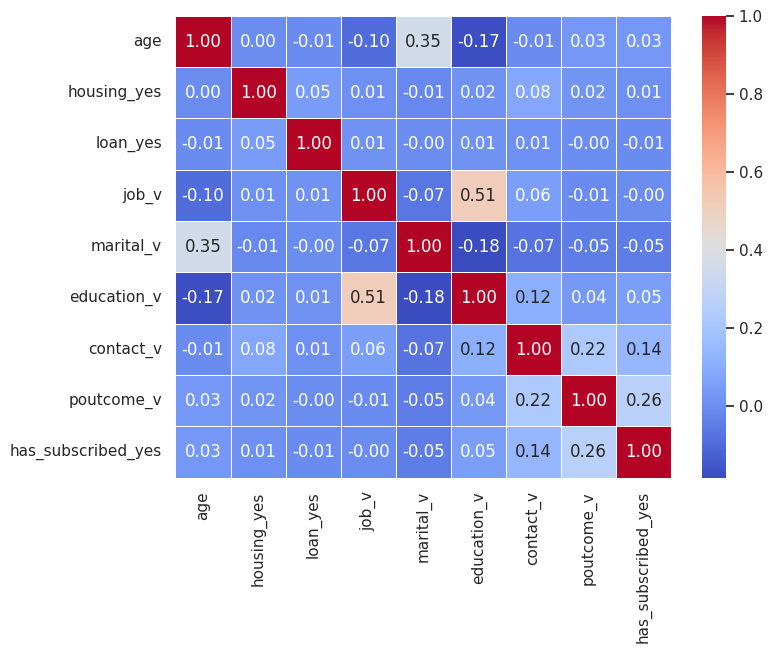

In [192]:
matriz_correlacion = df3.corr()

sns.set(style="white") 
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.show()

In [193]:
matriz_correlacion['has_subscribed_yes']

age                   0.030130
housing_yes           0.009996
loan_yes             -0.005603
job_v                -0.001022
marital_v            -0.048046
education_v           0.052682
contact_v             0.140866
poutcome_v            0.261619
has_subscribed_yes    1.000000
Name: has_subscribed_yes, dtype: float64

## Select variables with the highest correlation


In [194]:
df_to_model = pd.DataFrame()
df_to_model = df3[ ['age', 'marital_v','education_v','contact_v','poutcome_v','has_subscribed_yes'] ]
df_to_model.head()

,age,marital_v,education_v,contact_v,poutcome_v,has_subscribed_yes
0,56,2.0,1.0,0.0,0.0,0.0
1,57,2.0,4.0,0.0,0.0,0.0
2,37,2.0,4.0,0.0,0.0,0.0
3,40,2.0,2.0,0.0,0.0,0.0
4,56,2.0,4.0,0.0,0.0,0.0


## Conclusion:

Now, We have a data set ('df_to_model') for the next step, modeling, we need a classifier like Logistic Regression, KNN, SVM, Naive, etc.).


## Model:

<center>
<img src="model.jpg" width="480" height="680">
</center>
    
$$
where:
\begin{cases}
x_{1} = age\\
x_{2} = marital\\ 
x_{3} = education\\ 
x_{4} = contact\\ 
x_{5} = poutcome\\ 
y = Has \_ subscribed
\end{cases}
$$

We save our data set.

In [195]:
df_to_model.to_csv('dataset_to_model.csv')